In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from project_utils import *

%load_ext autoreload
%autoreload 2

## Build graph

In [2]:
actors_agg_df = pd.read_pickle("actors_agg_df.pkl")

In [3]:
nodes_df = actors_agg_df[["cast", "crew", "production_companies", "genres", "movie_id"]]
nodes_df.head()

,cast,crew,production_companies,genres,movie_id
actor_id,,,,,
0,"{Wylie Small, Ann B. Davis, Sylvia Jefferies, ...","{Rick Friedberg, Peter Segal, Jay Levey, Rob Z...","{Spectacle Entertainment Group, Cinecorp, Holl...","{Crime, Action, Horror, Comedy}","{1585, 2338, 3619, 2551}"
1,"{Melissa Leo, Faran Tahir, Carla Gugino, Vanes...","{Antoine Fuqua, Jon Avnet, Roger Michell, Jon ...","{Millennium Films, Goldcrest Pictures, Gidden ...","{Action, Comedy, Drama, Thriller, Romance, Crime}","{2400, 609, 2275, 1712, 1232, 1233, 761, 1597}"
2,"{Kevin Pollak, Gabriel Basso, Kyle Chandler, J...","{Randall Wallace, J.J. Abrams, Brad J. Silverm...","{Amblin Entertainment, K/O Camera Toys, WingNu...","{Fantasy, Science Fiction, Drama, Thriller, Mu...","{4203, 908, 1381, 327}"
3,"{Siddharth, Kunal Kapoor, Alice Patten, Arif Z...","{Rakeysh Omprakash Mehra, Deepa Mehta}","{Cracking the Earth Films, Flicks Motion Pictu...",{Drama},"{1023, 3543}"
4,"{Gerry Quigley, Torquil Colbo, Judah Katz, Mic...","{Alejandro Amenábar, Alexander Witt, Marc Abra...","{Miramax Films, Parkway Pictures (I), Impact P...","{Action, Science Fiction, Drama, Thriller, Rom...","{380, 2242, 2267, 956}"


## Get translations of ids to names

In [4]:
dict_id_actor = dict(zip(actors_agg_df.index, actors_agg_df["actors"]))
dict_actor_id = dict(zip(actors_agg_df["actors"], actors_agg_df.index))

## Get cast intersecctions length mat

## Get cast intersections

In [5]:
col = "cast"
cast_col = nodes_df[col]
cast_adj_raw = get_intersections_length_adj_mat(cast_col)
cast_adj_diag = np.diag(np.diag(cast_adj_raw))
cast_adj = cast_adj_raw - cast_adj_diag

Time:  25.1891613


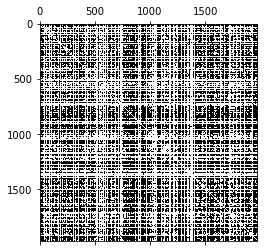

In [6]:
plt.spy(cast_adj)

In [7]:
np.save("cast_adj", cast_adj)

### Print most connected actors

In [8]:
actor_id_col = "actor_id"
cast_node_degree = cast_adj.sum(axis=1)
most_connected_actors_id = np.argsort(-cast_node_degree)[:20]
most_connected_actors = [dict_id_actor.get(id_) for id_ in most_connected_actors_id]
actors_agg_df[actors_agg_df.index.isin(most_connected_actors_id)]
print(most_connected_actors)

['Samuel L. Jackson', 'Morgan Freeman', 'Bruce Willis', 'Owen Wilson', 'Liam Neeson', 'Matt Damon', 'Robert De Niro', 'Alec Baldwin', 'Gary Oldman', 'Steve Buscemi', 'Bill Hader', 'Paul Giamatti', 'Brad Pitt', 'Willem Dafoe', 'Will Ferrell', 'Ben Affleck', 'John C. Reilly', 'Tom Cruise', 'John Goodman', 'Ben Stiller']


**Test whether cast_adj[i,j] corresponds to the cardinality of the intersection of node[i] and node [j] casts**

In [9]:
test_actors_df = actors_agg_df[["actors","cast", "crew", "production_companies", "genres", "movie_id"]]
test_actor_1 = test_actors_df[test_actors_df["actors"]=="Brad Pitt"]
test_actor_1_id = test_actor_1.index[0]
test_actor_2 = test_actors_df[test_actors_df["actors"]=="Angelina Jolie"]
test_actor_2_id = test_actor_2.index[0]
cast_adj_2_1 = len(test_actor_2["cast"][test_actor_2.index[0]].intersection(test_actor_1["cast"][test_actor_1.index[0]]))
assert cast_adj_2_1 == cast_adj[test_actor_1_id,test_actor_2_id], "The cast adjacency entries don't correspond to actor ids"
assert cast_adj_2_1 == cast_adj[test_actor_2_id,test_actor_1_id], "cast_adj is not symmetric"
print("Test passed")

Test passed


## Get cast unions length mat

In [10]:
col = "cast"
cast_col = nodes_df[col]
cast_adj_union_raw = get_unions_length_adj_mat(cast_col)
cast_adj_union_diag = np.diag(np.diag(cast_adj_union_raw))
cast_adj_union = cast_adj_union_raw - cast_adj_union_diag

Time:  112.3490361


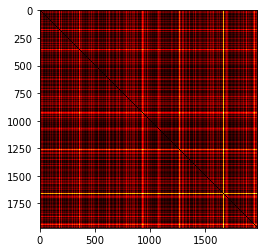

In [11]:
plt.imshow(cast_adj_union, cmap="hot", interpolation="none")

In [12]:
np.save("cast_adj_union", cast_adj_union)

## Get movies intersections length mat

In [13]:
col = "movie_id"
movie_col = nodes_df[col]
movie_adj_raw = get_intersections_length_adj_mat(movie_col)
movie_adj_diag = np.diag(np.diag(movie_adj_raw))
movie_adj = movie_adj_raw - movie_adj_diag

Time:  5.122016300000013


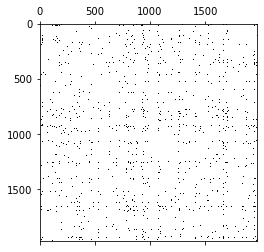

In [14]:
plt.spy(movie_adj)

In [15]:
np.save("movie_adj", movie_adj)

## Get movies union length mat

In [16]:
col = "movie_id"
movie_col = nodes_df[col]
movie_adj_union_raw = get_unions_length_adj_mat(movie_col)
movie_adj_union_diag = np.diag(np.diag(movie_adj_union_raw))
movie_adj_union = movie_adj_union_raw - movie_adj_union_diag

Time:  7.141797800000006


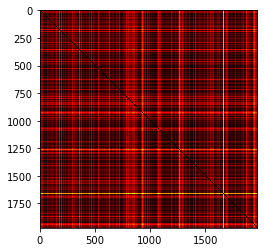

In [17]:
plt.imshow(movie_adj_union, cmap="hot", interpolation="none")

In [18]:
np.save("movie_adj_union", movie_adj_union)

## Get directors intersections length mat

In [19]:
col = "crew"
crew_col = nodes_df[col]
crew_adj_raw = get_intersections_length_adj_mat(crew_col)
crew_adj_diag = np.diag(np.diag(crew_adj_raw))
crew_adj = crew_adj_raw - crew_adj_diag

Time:  5.192370100000005


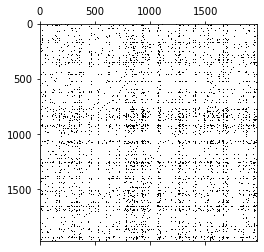

In [20]:
plt.spy(crew_adj)

In [21]:
np.save("crew_adj", crew_adj)

## Get directors union length mat

In [22]:
col = "crew"
crew_col = nodes_df[col]
crew_adj_union_raw = get_unions_length_adj_mat(crew_col)
crew_adj_union_diag = np.diag(np.diag(crew_adj_union_raw))
crew_adj_union = crew_adj_union_raw - crew_adj_union_diag

Time:  8.923562199999992


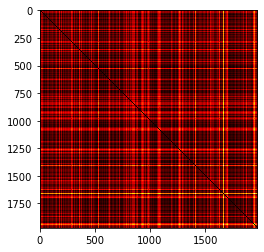

In [23]:
plt.imshow(crew_adj_union, cmap="hot", interpolation="none")

In [24]:
np.save("crew_adj_union", crew_adj_union)

## Get production companies intersections length mat

In [25]:
col = "production_companies"
prod_comp_col = nodes_df[col]
prod_comp_adj_raw = get_intersections_length_adj_mat(prod_comp_col)
prod_comp_adj_diag = np.diag(np.diag(prod_comp_adj_raw))
prod_comp_adj = prod_comp_adj_raw - prod_comp_adj_diag

Time:  8.852529500000003


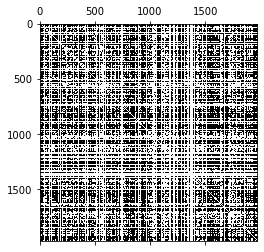

In [26]:
plt.spy(prod_comp_adj)

In [27]:
np.save("prod_comp_adj", prod_comp_adj)

## Get production companies unions length mat

In [28]:
col = "production_companies"
prod_comp_col = nodes_df[col]
prod_comp_adj_union_raw = get_unions_length_adj_mat(prod_comp_col)
prod_comp_adj_union_diag = np.diag(np.diag(prod_comp_adj_union_raw))
prod_comp_adj_union = prod_comp_adj_union_raw - prod_comp_adj_union_diag

Time:  12.690026100000011


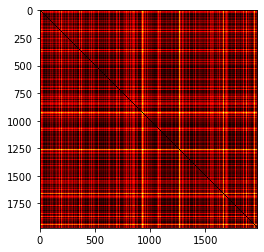

In [29]:
plt.imshow(prod_comp_adj_union, cmap="hot", interpolation="none")

In [30]:
np.save("prod_comp_adj_union", prod_comp_adj_union)

## Get genres intersections length mat

In [31]:
col = "genres"
genres_col = nodes_df[col]
genres_adj_raw = get_intersections_length_adj_mat(genres_col)
genres_adj_diag = np.diag(np.diag(genres_adj_raw))
genres_adj = genres_adj_raw - genres_adj_diag

Time:  4.995659000000018


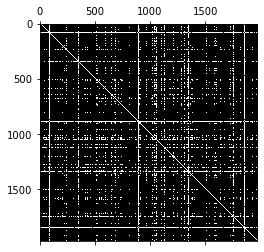

In [32]:
plt.spy(genres_adj)

In [33]:
np.save("genres_adj", genres_adj)

## Get genres unions length mat

In [34]:
col = "genres"
genres_col = nodes_df[col]
genres_adj_union_raw = get_unions_length_adj_mat(genres_col)
genres_adj_union_diag = np.diag(np.diag(genres_adj_union_raw))
genres_adj_union = genres_adj_union_raw - genres_adj_union_diag

Time:  5.59827469999999


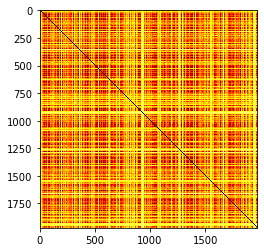

In [35]:
plt.imshow(genres_adj_union, cmap="hot", interpolation="none")

In [36]:
np.save("genres_adj_union", genres_adj_union)

## Aggregated adjacency matrix

In [37]:
agg_adj = np.divide(
    (
        0.3 * cast_adj
        + 0.3 * movie_adj
        + 0.2 * crew_adj
        + 0.1 * genres_adj
        + 0.1 * prod_comp_adj
    ),
    (
        0.3 * cast_adj_union
        + 0.3 * movie_adj_union
        + 0.2 * crew_adj_union
        + 0.1 * genres_adj_union
        + 0.1 * prod_comp_adj_union
    ),
)
agg_adj = np.where(np.isnan(agg_adj), 0, agg_adj)
np.sum(agg_adj)

C:\Users\AndresMontero\.conda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


30602.227559265917

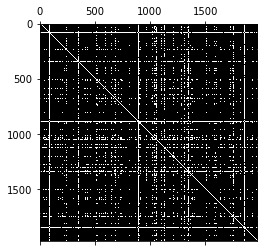

In [38]:
plt.spy(agg_adj)

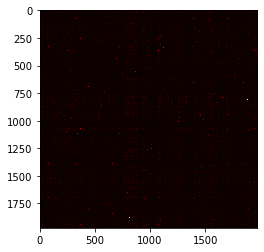

In [39]:
plt.imshow(agg_adj, cmap="hot", interpolation="none")

In [40]:
np.min(agg_adj)

0.0

In [41]:
np.max(agg_adj)

0.9657142857142856

In [42]:
np.save("agg_adj", agg_adj)

## Sparsify graph

In [43]:
percentile = 75
eps = np.percentile(agg_adj, percentile)
print(eps)

0.010261672652642379


In [44]:
sparse_agg_adj = sparsify_mat(agg_adj, eps)

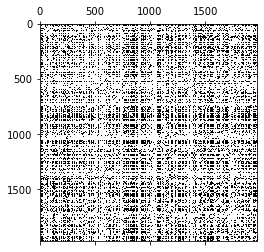

In [45]:
plt.spy(sparse_agg_adj)

In [46]:
np.save("sparse_agg_actor_adj", sparse_agg_adj)

## Tests

### Test consistency of data

In [47]:
# Test if actor belongs to movie
movie_id_col = "movie_id"
title_col = "title"
actors_col = "actors"
actor = "Sam Worthington"
movies_idx_df = pd.read_csv("movies_idx.csv")
dict_id_movie = dict(zip(movies_idx_df.index, movies_idx_df[title_col]))
actor_id = dict_actor_id.get(actor)
test_movie_id = actors_agg_df[actors_agg_df[actors_col] == actor].loc[
    actor_id, movie_id_col
]
[dict_id_movie.get(movie_id) for movie_id in list(test_movie_id)]

['Avatar',
 'The Debt',
 'Wrath of the Titans',
 'Sabotage',
 'Terminator Salvation',
 'Clash of the Titans',
 'The Great Raid',
 "Hart's War",
 'Man on a Ledge',
 'Everest']

In [48]:
# Test number of actors
len(np.unique(actors_agg_df.index.values))

1971